## Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns  
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [2]:
df = pd.read_excel('../data/raw/train.xlsx') 

## Understanding the Dataset

In [3]:
df.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,...,-1.8,93.075,-47.1,1.498,5099.1,999.0,0.0,no,NaN,1.0
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,...,1.4,93.918,-42.7,4.968,5228.1,999.0,0.0,no,NaN,2.0
2,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,...,1.4,94.465,-41.8,4.961,5228.1,999.0,0.0,no,NaN,3.0
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,no,NaN,4.0
4,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,no,NaN,5.0


In [4]:
# Checking the shape of the dataset
df.shape

(8240, 24)

In [5]:
df.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded', 'profit', 'id'],
      dtype='object')

In [6]:
# Checking the data type of each feature in the dataset
for col in df.columns:
    print(f"Column Name : {col} \nValues : {df[col].unique()} \n")

Column Name : custAge 
Values : [34. 31. nan 52. 39. 40. 50. 41. 23. 29. 57. 33. 59. 38. 44. 51. 37. 55.
 27. 24. 25. 35. 53. 28. 45. 56. 80. 94. 42. 30. 46. 32. 47. 49. 43. 36.
 58. 26. 63. 21. 48. 70. 22. 54. 19. 72. 61. 65. 60. 66. 68. 71. 77. 85.
 62. 73. 64. 81. 67. 74. 82. 79. 75. 84. 20. 76. 91. 69. 88. 18. 78. 83.
 86.] 

Column Name : profession 
Values : ['admin.' 'services' 'blue-collar' 'entrepreneur' 'technician' 'retired'
 'housemaid' 'student' 'unknown' 'unemployed' 'self-employed' 'management'
 nan] 

Column Name : marital 
Values : ['single' 'divorced' 'married' 'unknown' nan] 

Column Name : schooling 
Values : ['university.degree' 'high.school' nan 'professional.course' 'basic.4y'
 'unknown' 'basic.9y' 'basic.6y' 'illiterate'] 

Column Name : default 
Values : ['no' 'unknown' 'yes' nan] 

Column Name : housing 
Values : ['no' 'yes' 'unknown' nan] 

Column Name : loan 
Values : ['yes' 'no' 'unknown' nan] 

Column Name : contact 
Values : ['cellular' 'telephone' nan] 


Useless Features
- id : This column is an identifier or index for each record. It does not provide any meaningful information for analysis as it is just an identifier.

Categorical and Numerical Features are categorized below

### Summarising Features into Categories

In [7]:
numerical_features = ["custAge", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "pmonths", "pastEmail", "profit"]

categorical_features = ["profession","marital","schooling","default","housing","loan","contact","month","day_of_week","poutcome"]

## Summary Statistics

In [8]:
df.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,profit,id
count,6224.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,930.000000,8238.000000
mean,39.953728,2.531682,960.916606,0.183054,0.056397,93.570977,-40.577907,3.586929,5165.575965,960.687436,0.365501,77.709677,4119.500000
std,10.540516,2.709773,190.695054,0.514209,1.566550,0.578782,4.650101,1.742784,72.727423,191.841012,1.294101,2881.768500,2378.250092
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,-87622.112070,1.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000,124.000000,2060.250000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000,170.000000,4119.500000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000,213.000000,6178.750000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,25.000000,515.000000,8238.000000


## Detecting the Missing Values (if any)

In [9]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8240 entries, 0 to 8239
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         6224 non-null   float64
 1   profession      8238 non-null   object 
 2   marital         8238 non-null   object 
 3   schooling       5832 non-null   object 
 4   default         8238 non-null   object 
 5   housing         8238 non-null   object 
 6   loan            8238 non-null   object 
 7   contact         8238 non-null   object 
 8   month           8238 non-null   object 
 9   day_of_week     7451 non-null   object 
 10  campaign        8238 non-null   float64
 11  pdays           8238 non-null   float64
 12  previous        8238 non-null   float64
 13  poutcome        8238 non-null   object 
 14  emp.var.rate    8238 non-null   float64
 15  cons.price.idx  8238 non-null   float64
 16  cons.conf.idx   8238 non-null   float64
 17  euribor3m       8238 non-null   f

- Values are missing for the features custAge schooling, day_of_week, profit  

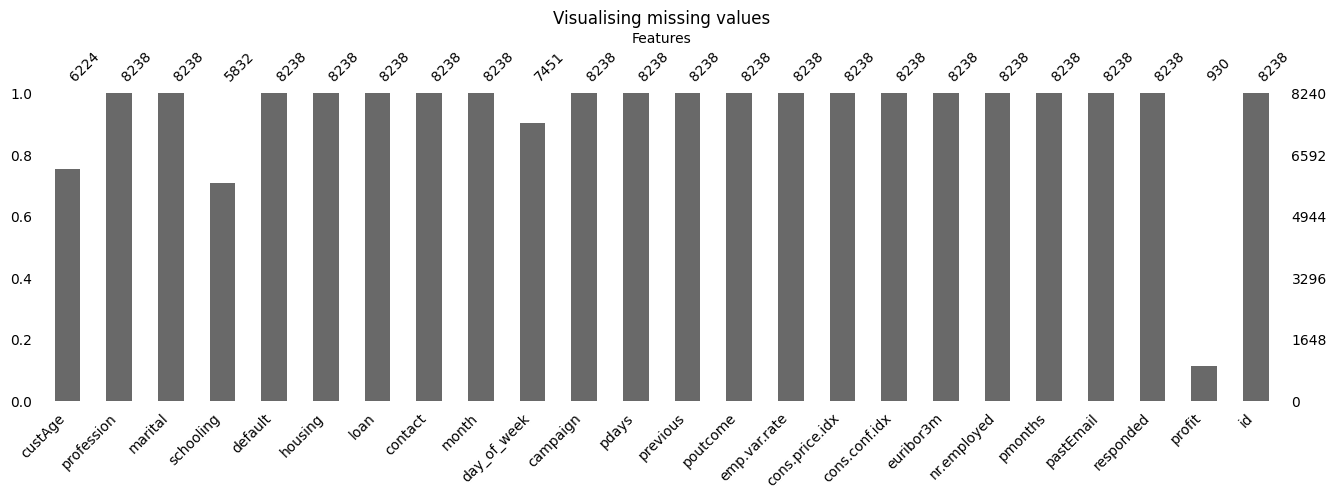

In [10]:
# Visualize missing values
msno.bar(df, figsize=(16, 4), fontsize=10)
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Visualising missing values')
plt.savefig('../visuals/missing_values_visualization.png', bbox_inches='tight', dpi=300) 
plt.show()

- The column 'profit' to be dropped as it contains minimum data compared to length of the dataset

## Check for Duplicate Rows

In [11]:
print("Number of duplicate rows:",df.duplicated().sum())

Number of duplicate rows: 0


## Univariate Analysis

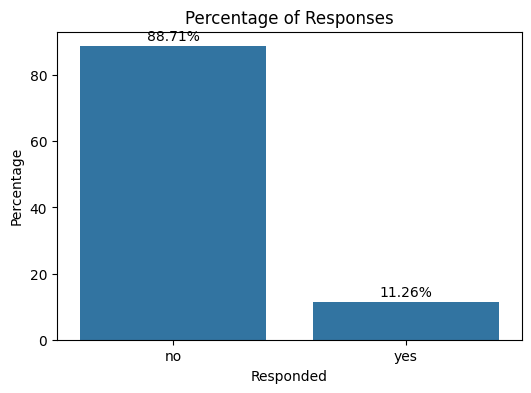

In [12]:
percentages =  df['responded'].value_counts() / len(df) * 100
plt.figure(figsize=(6, 4))
sns.barplot(data=pd.DataFrame({'responded': percentages.index, 'percentage': percentages.values}), x='responded', y='percentage')
plt.ylabel('Percentage')
plt.xlabel('Responded')
plt.title('Percentage of Responses')
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')
plt.savefig('../visuals/target_value_distribution.png', bbox_inches='tight', dpi=300) 
plt.show()

- It is necessary to address the imbalance in the dataset before creating the model, as the data is highly imbalanced with around 88% of the customers not responded while only 11% of them responded to the marketing campaign.

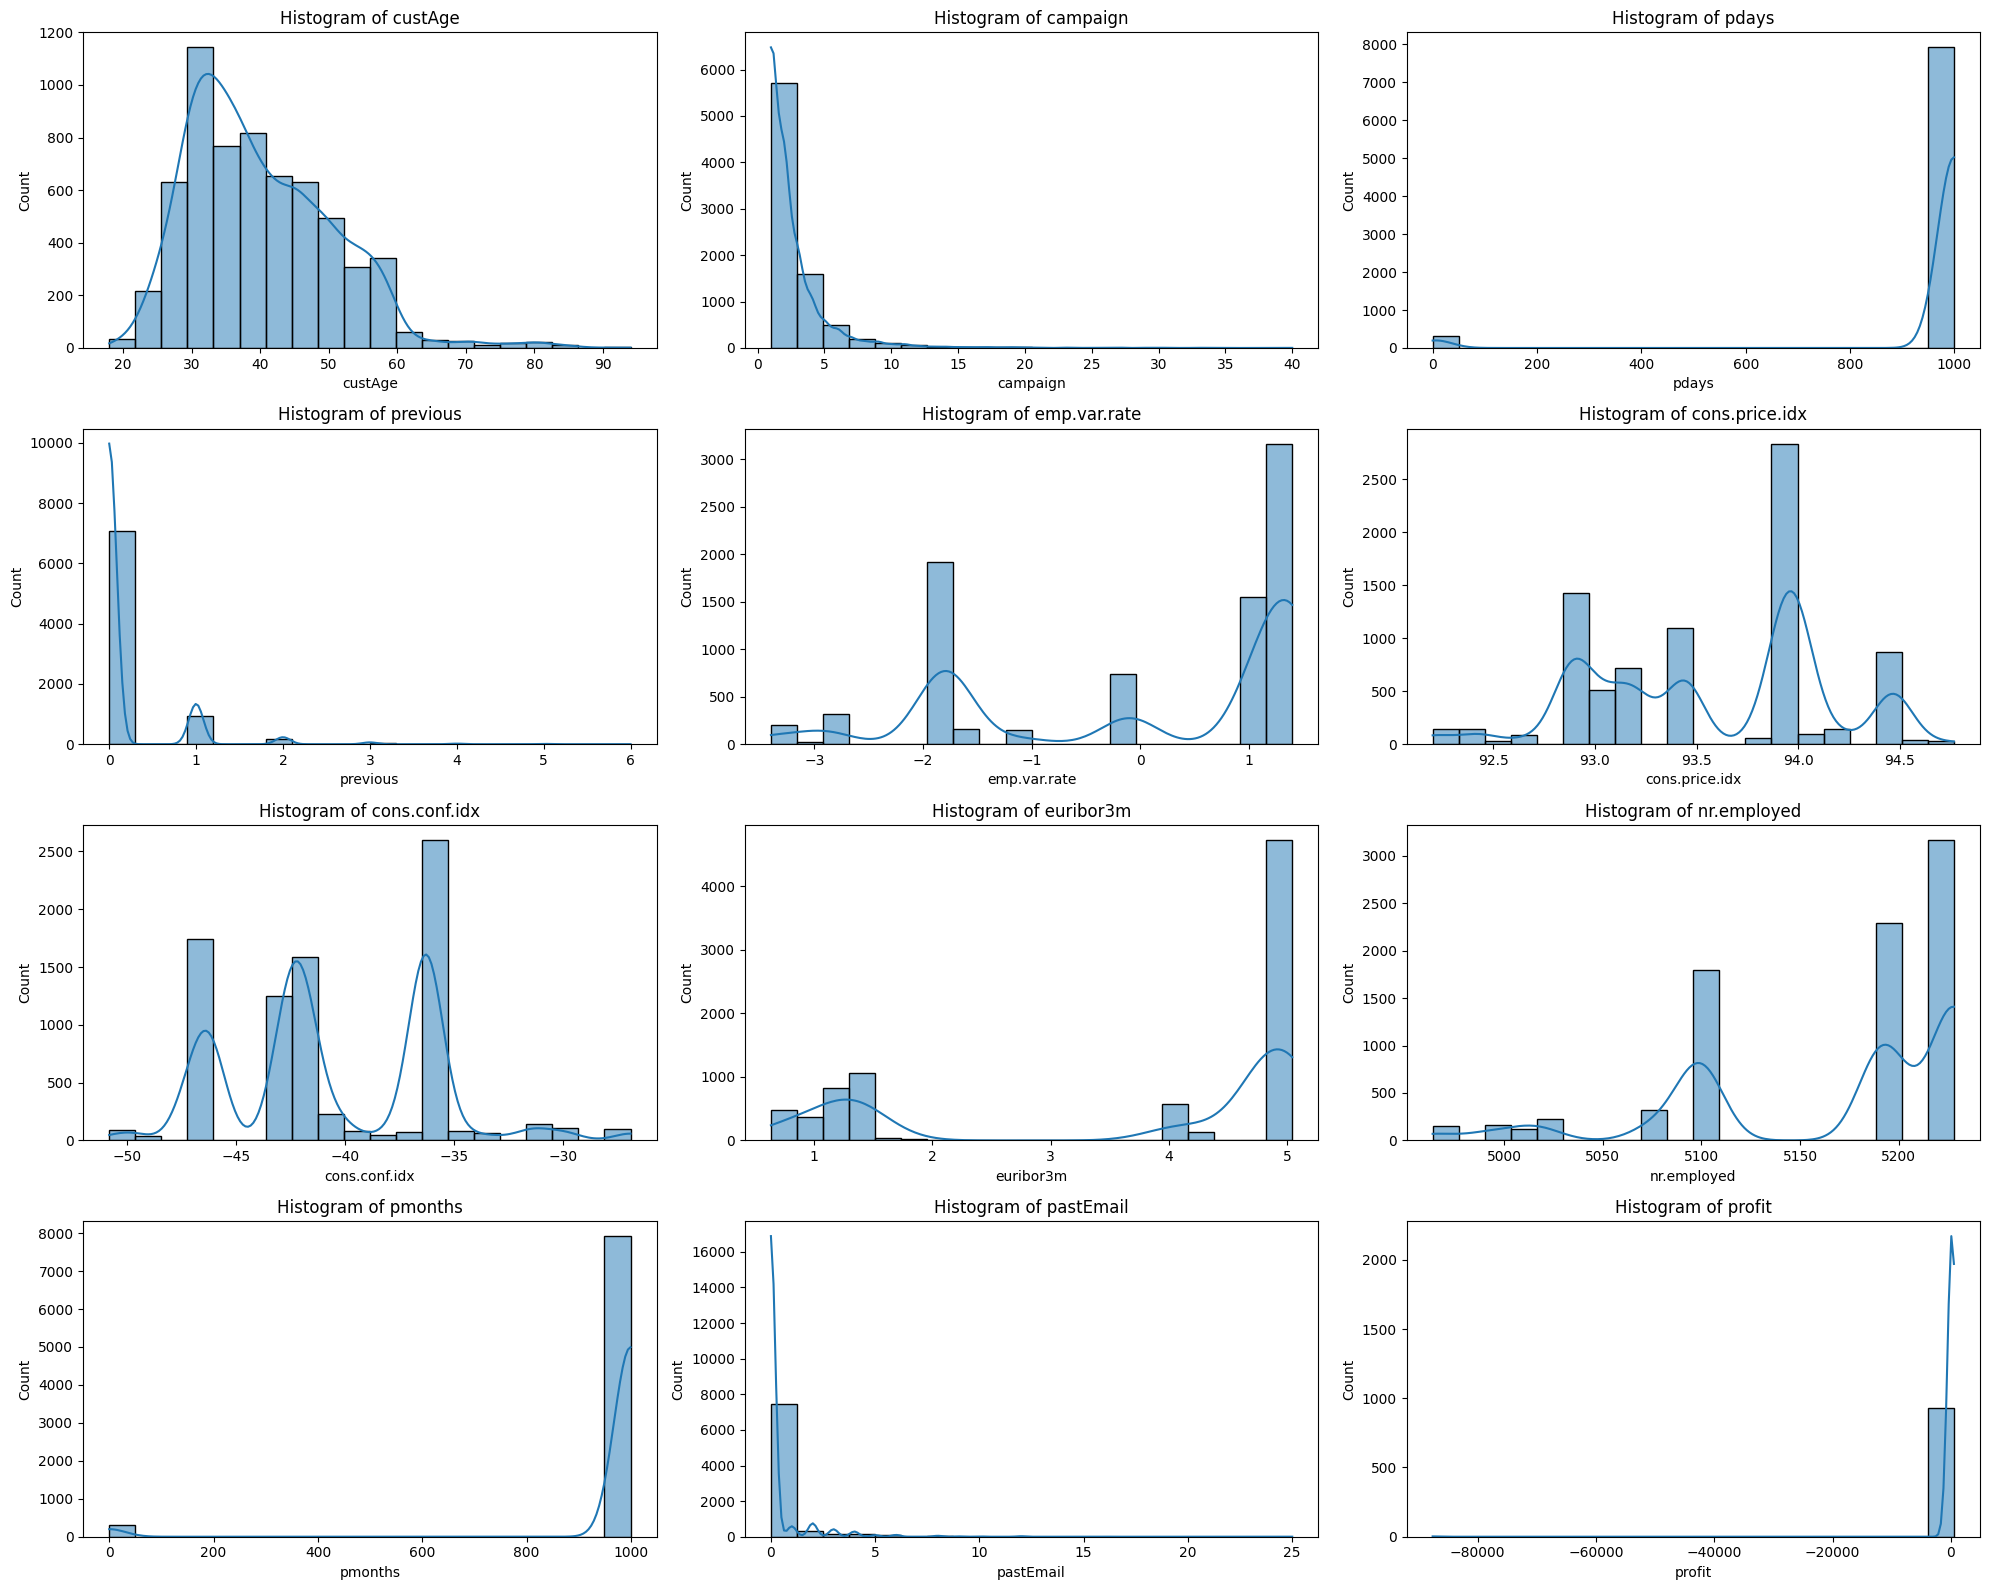

In [13]:
# Plotting histograms with kde(kernel density estimation) to analyze the distribution of data in each feature in the dataset
plt.figure(figsize=(20, 16))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.savefig('../visuals/histogram_numerical_features.png', bbox_inches='tight', dpi=300) 
plt.show()

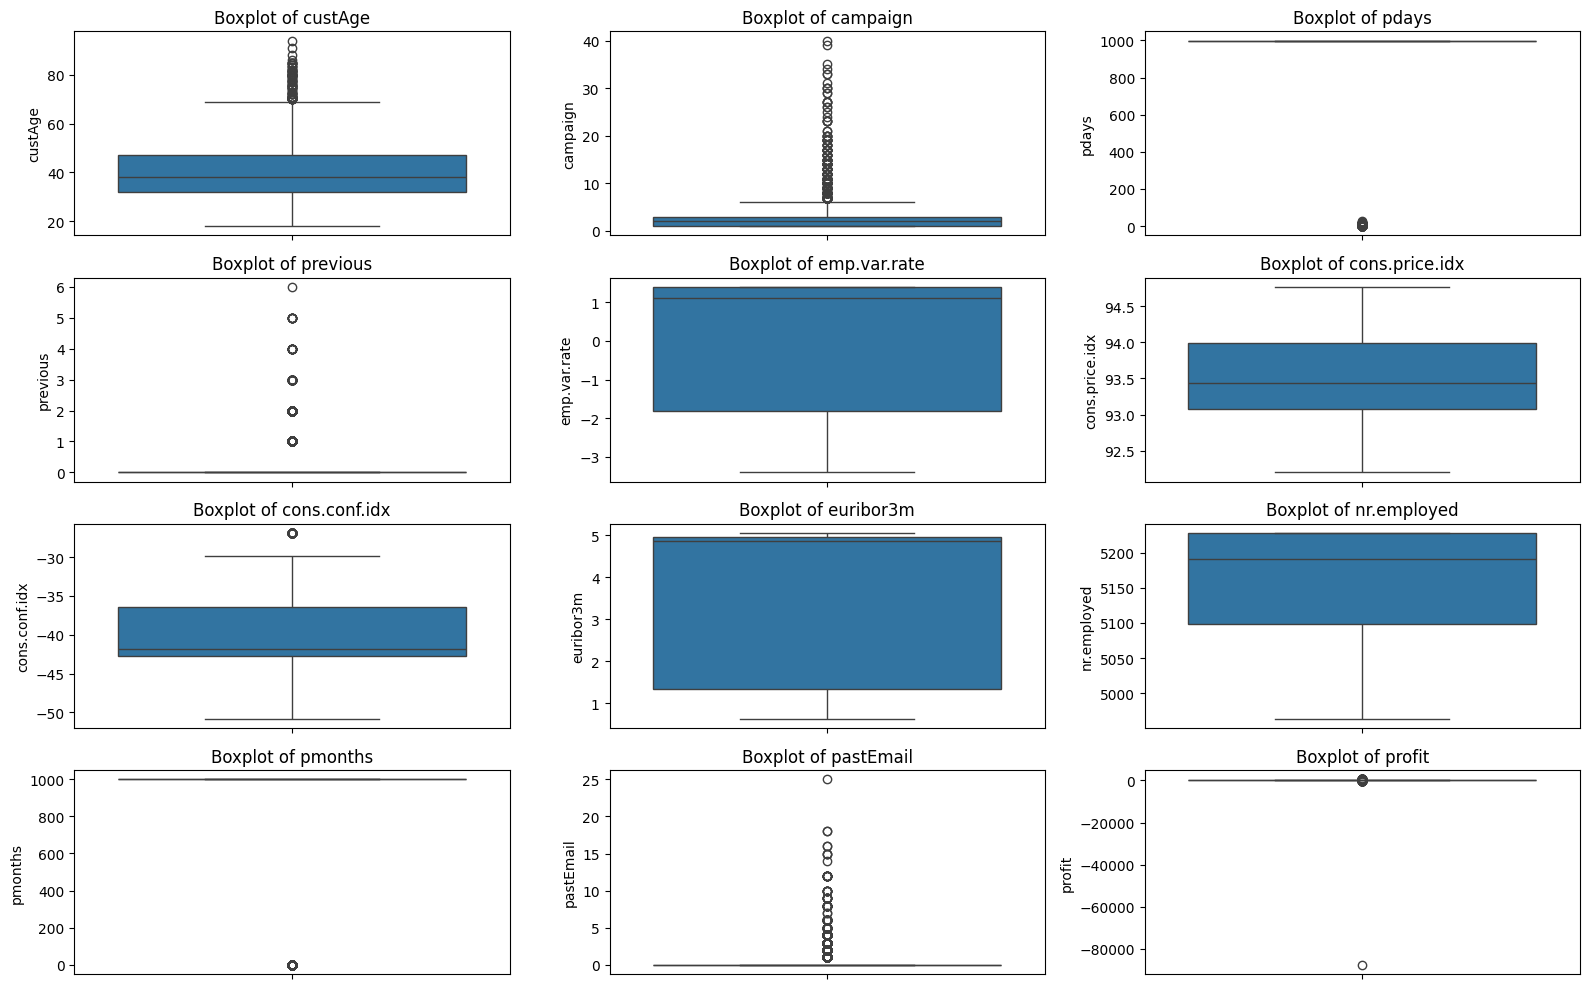

In [14]:
# Plotting boxplots to analyze the ouliers in the data
plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df,y=feature)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.savefig('../visuals/boxplot_numerical_features.png', bbox_inches='tight', dpi=300) 
plt.show()

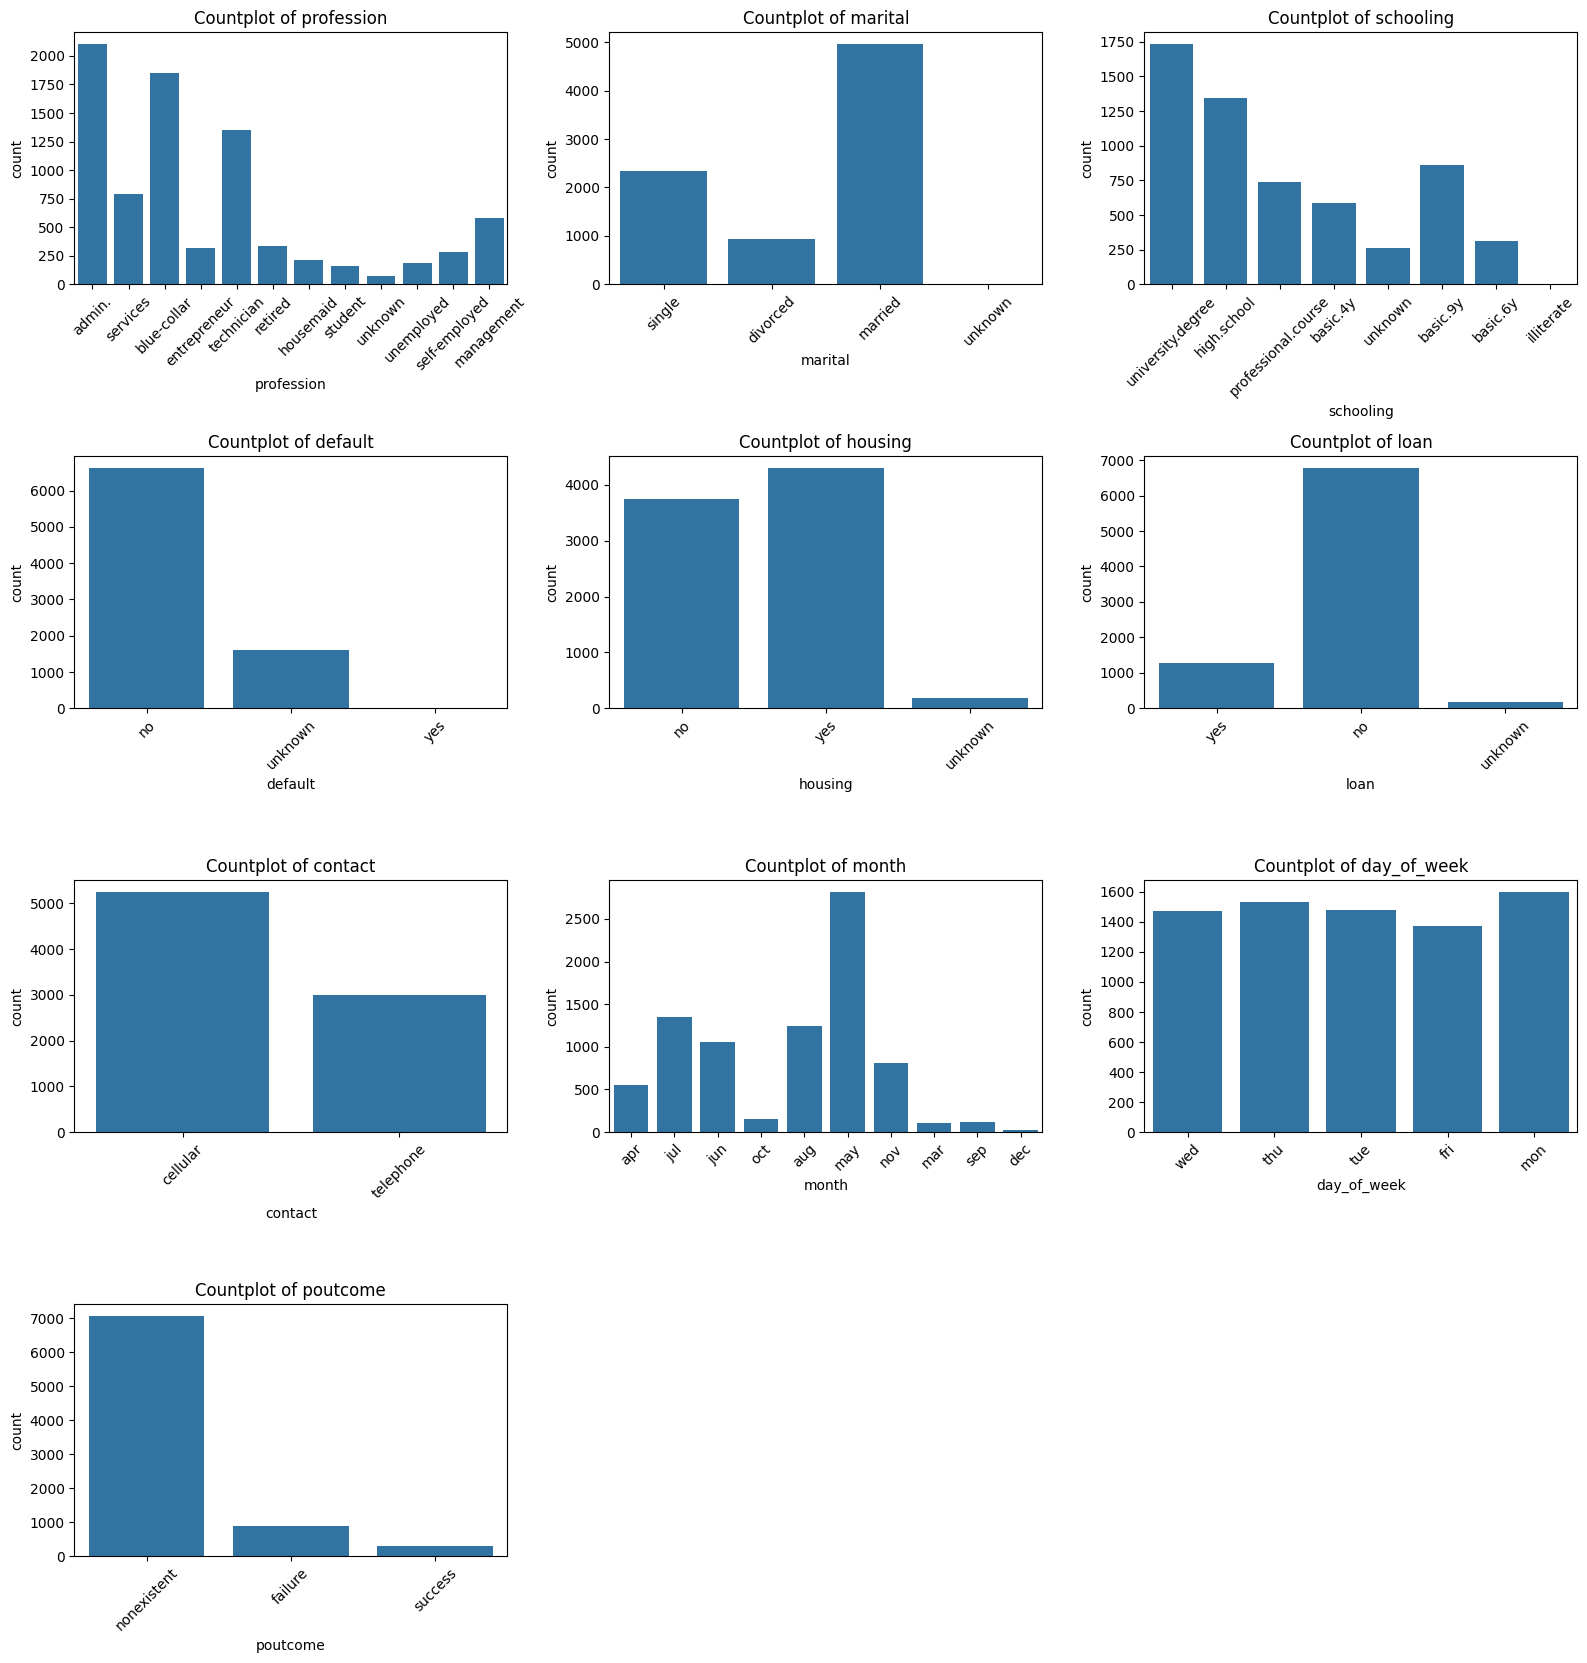

In [15]:
# Countplots to analyze the categorical distribution of categorical features
plt.figure(figsize=(16, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df, x=feature)
    plt.title(f'Countplot of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visuals/countplot_categorical_features.png', bbox_inches='tight', dpi=300) 
plt.show()

## Multivariate Analysis

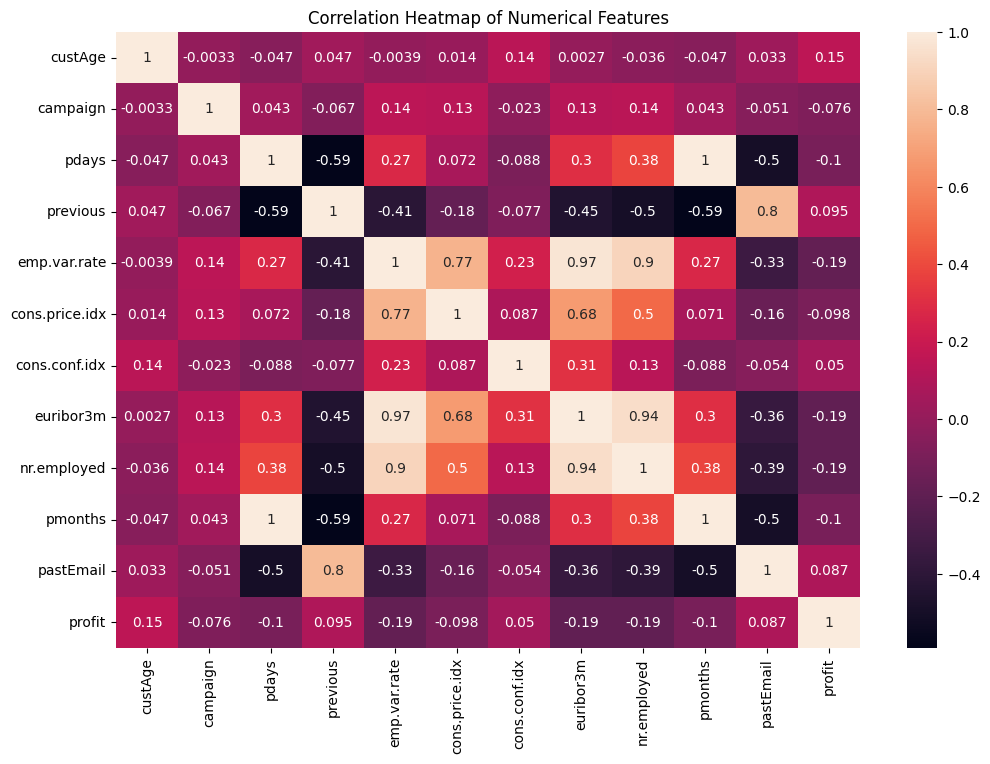

In [16]:
# Correlation plot for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('../visuals/correlation_heatmap_numerical_features.png', bbox_inches='tight', dpi=300) 
plt.show()

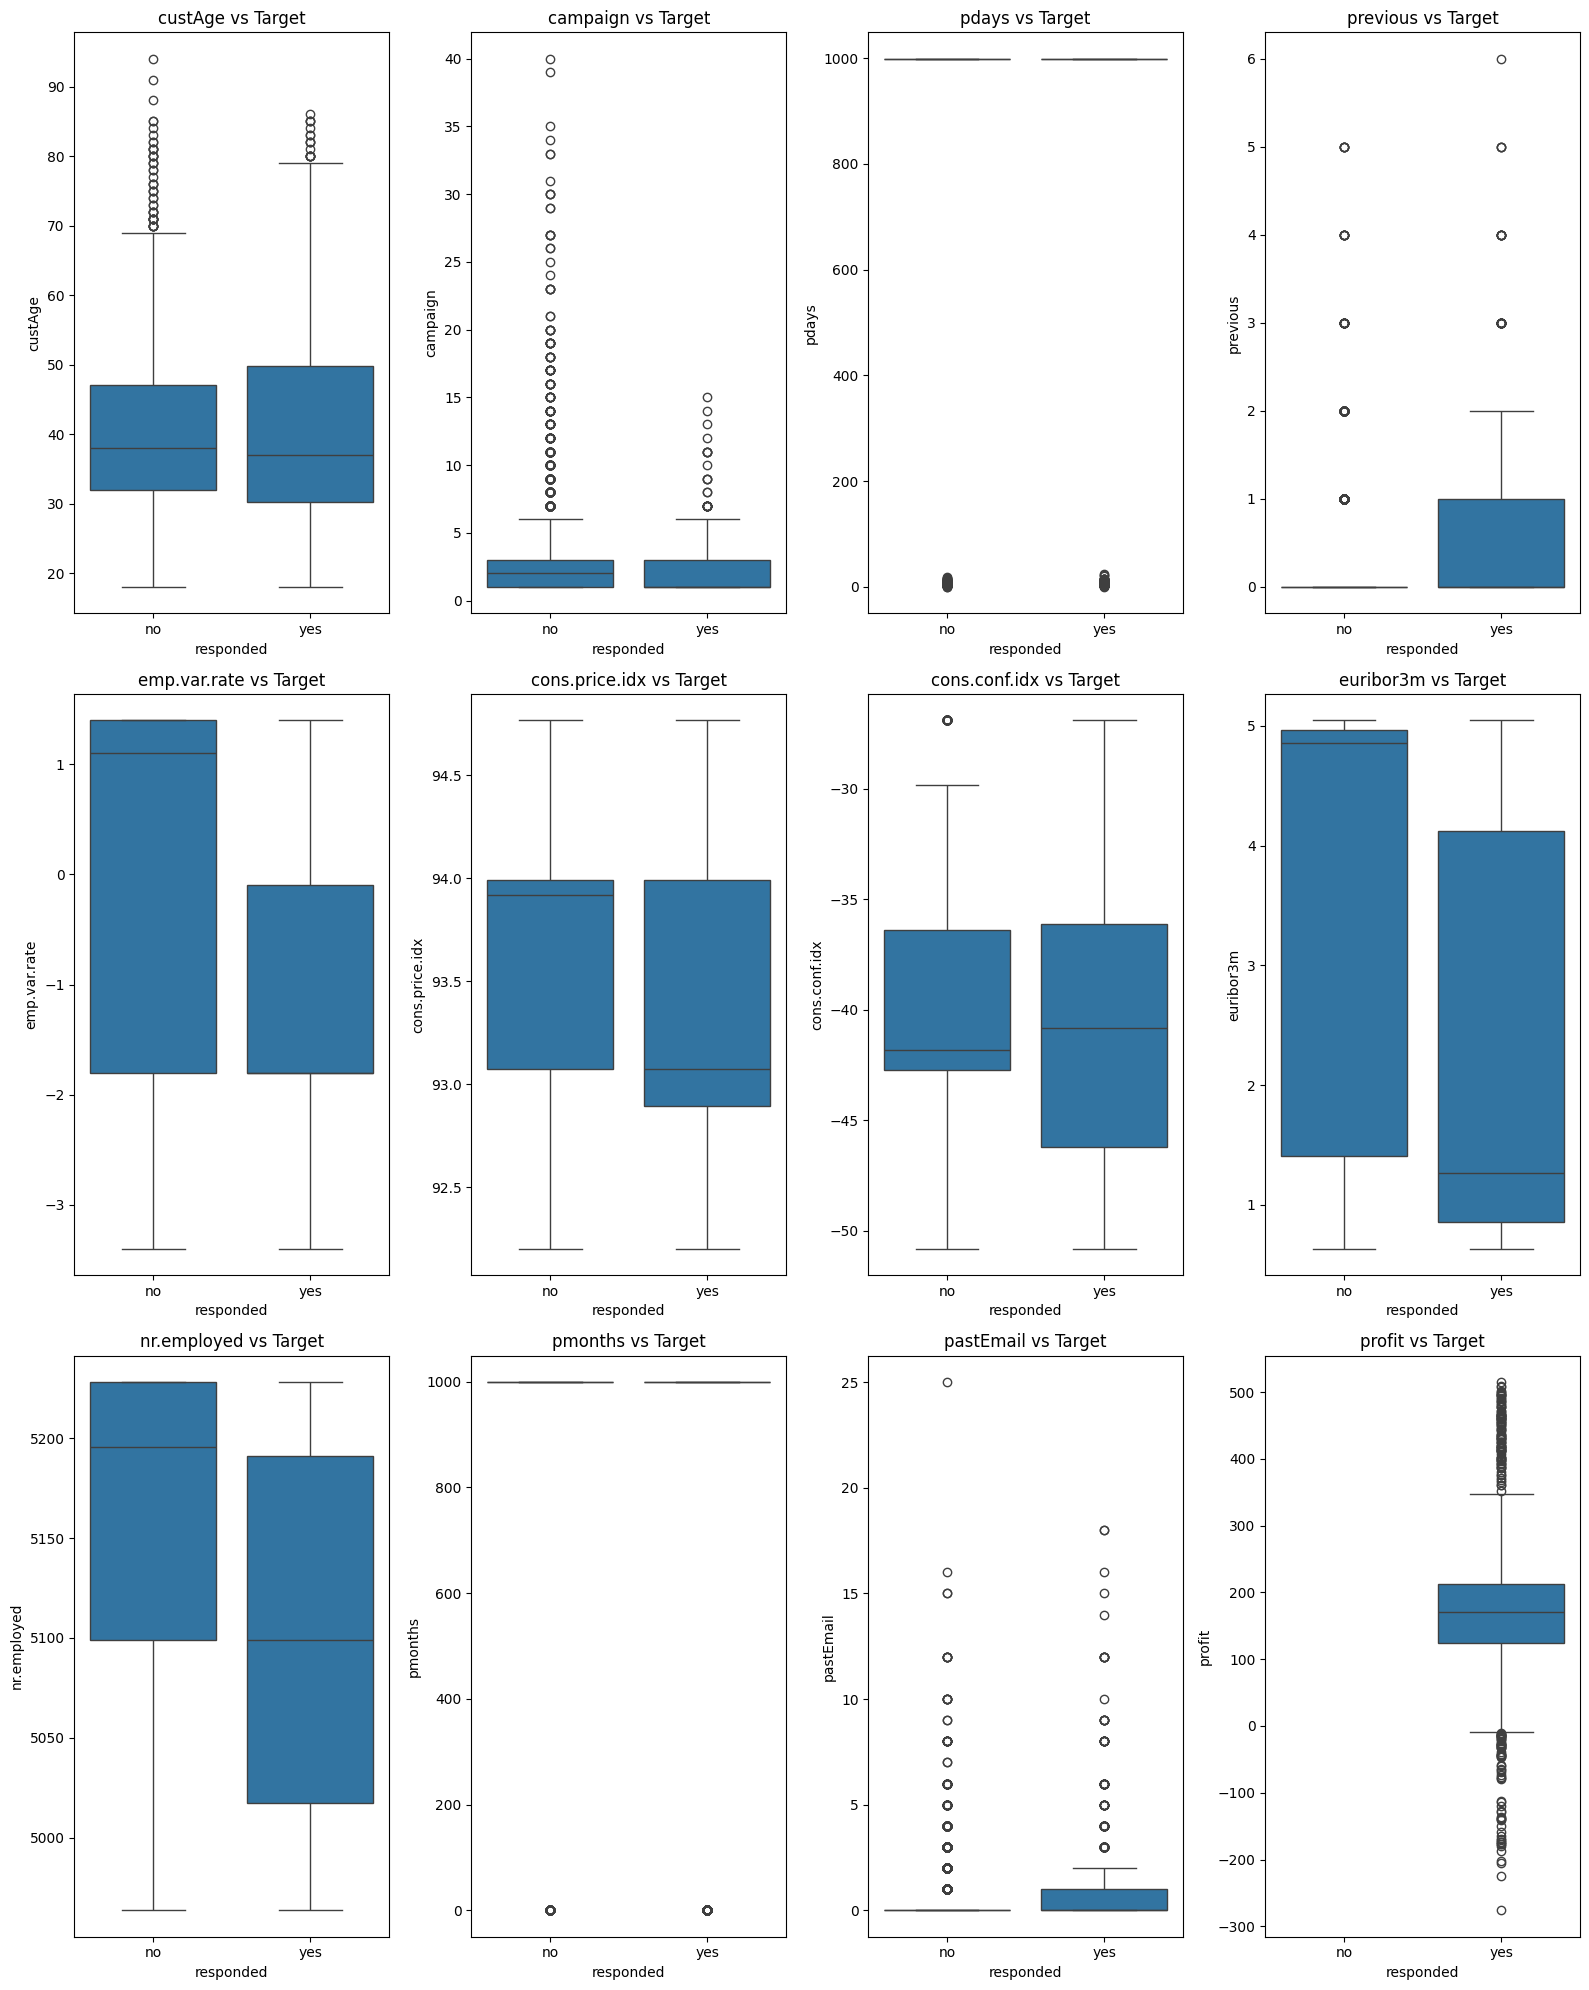

In [17]:
# Numerical vs Target
plt.figure(figsize=(16, 20))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, x='responded', y=column)
    plt.title(f'{column} vs Target')
plt.tight_layout()
plt.savefig('../visuals/boxplot_multivariate_numerical_vs_target.png', bbox_inches='tight', dpi=300) 
plt.show()

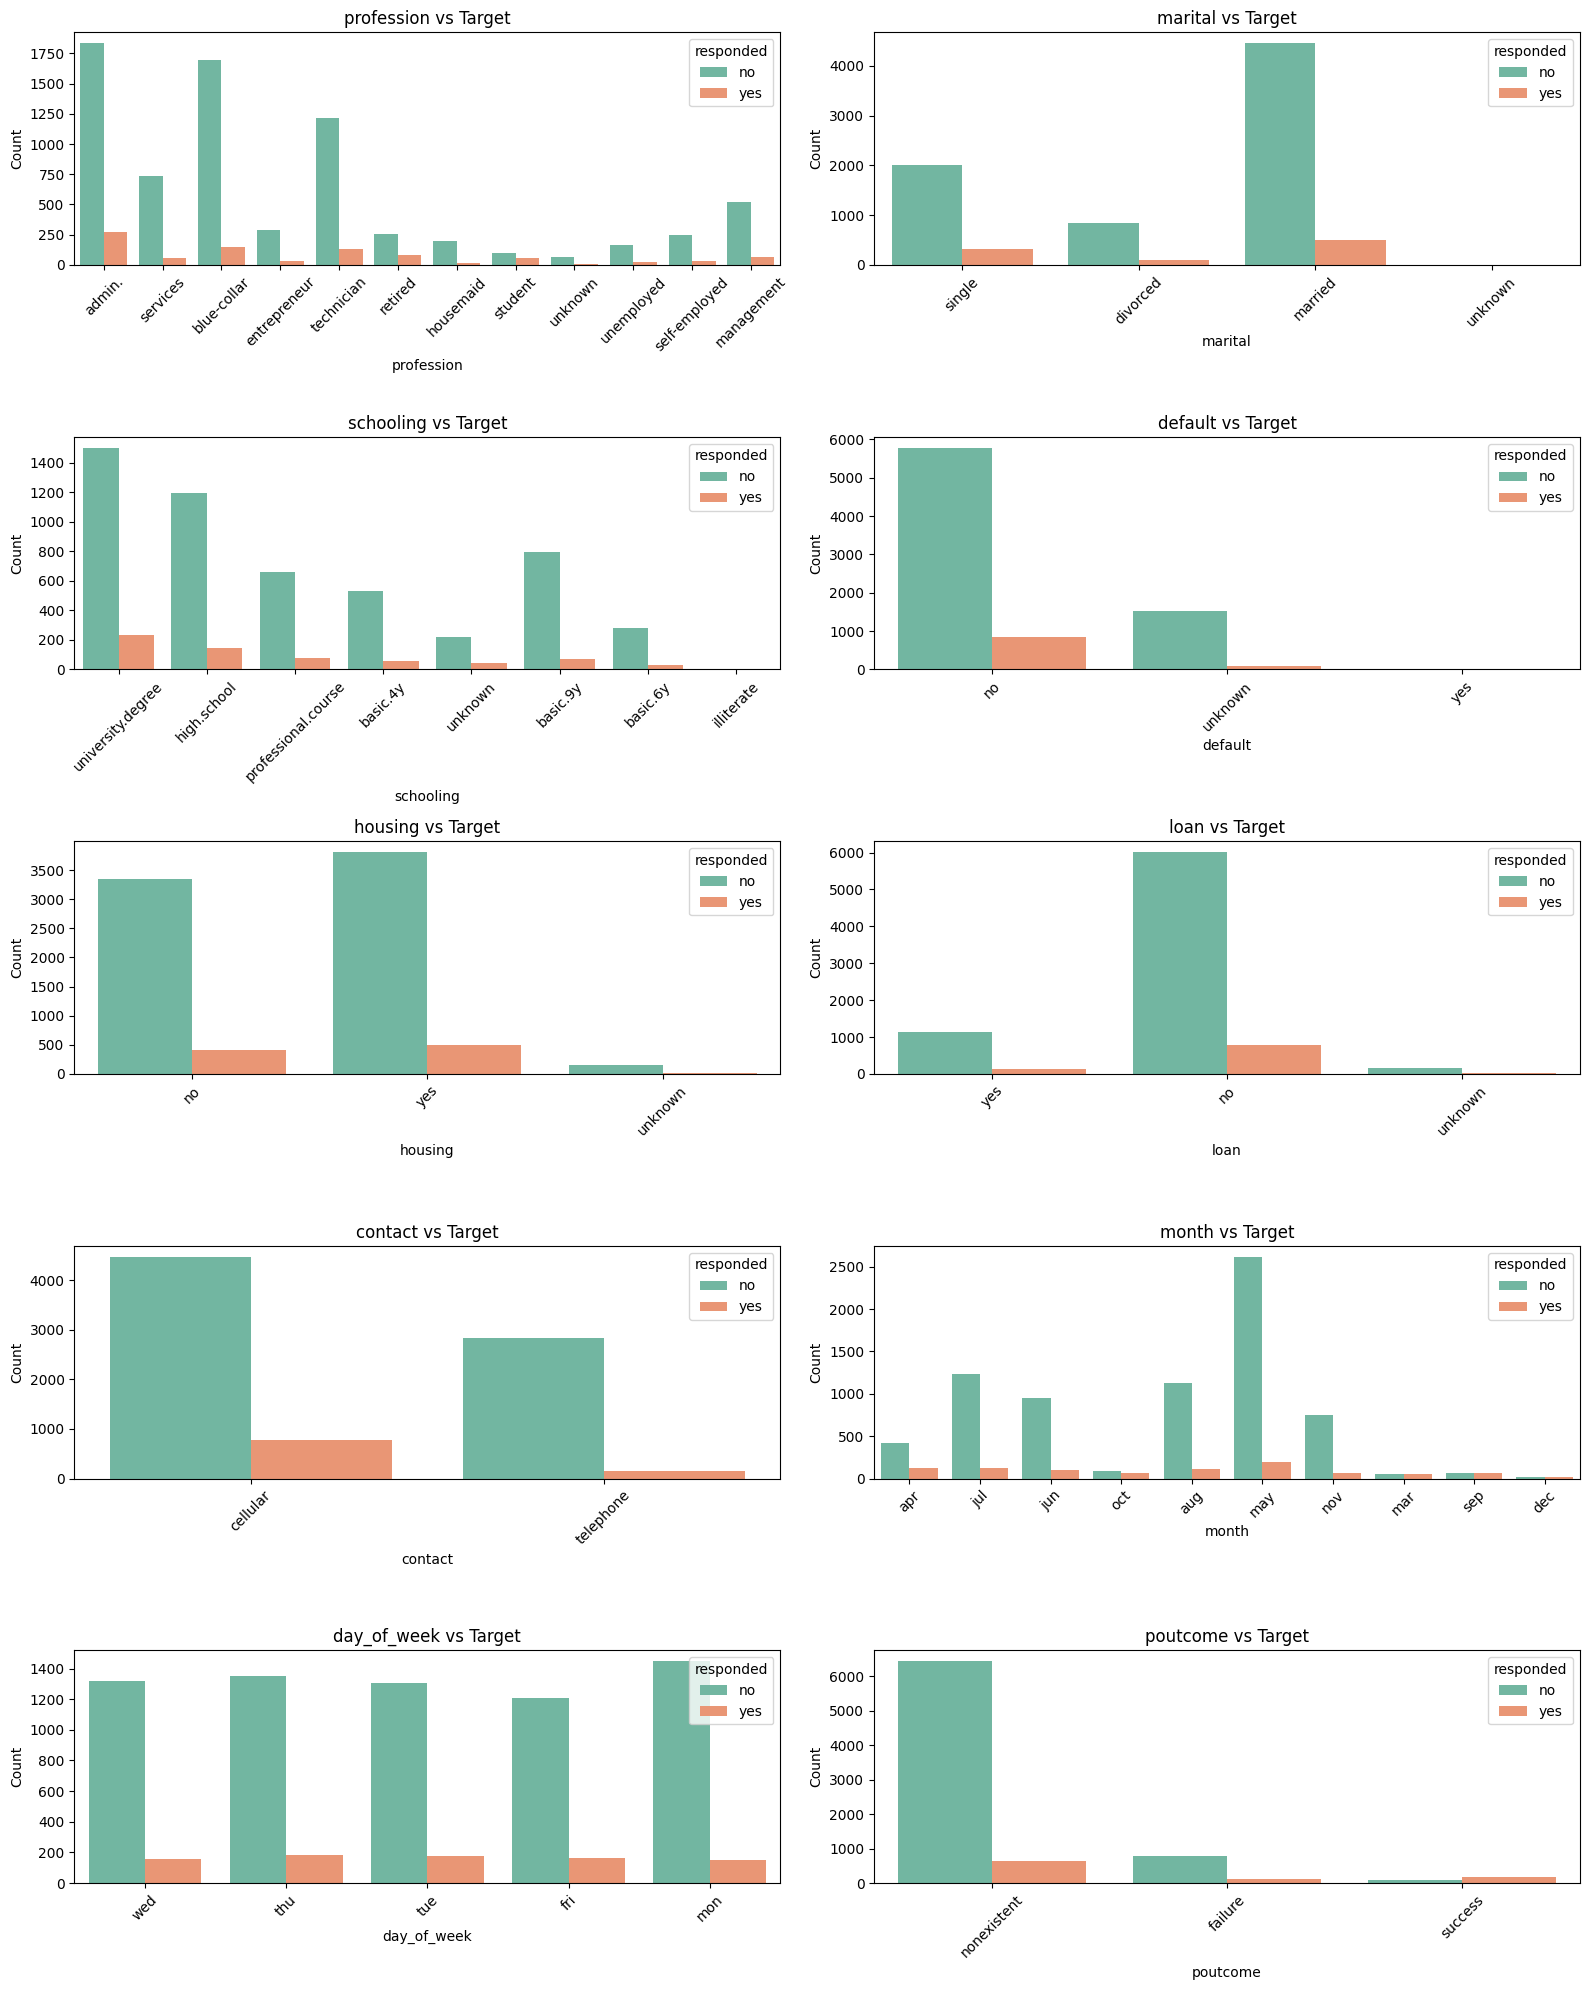

In [18]:
# Multivariate Analysis (Categorical vs Target)
plt.figure(figsize=(16, 20))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df, x=column, hue='responded', palette='Set2')
    plt.title(f'{column} vs Target')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visuals/countplot_multivariate_categorical_vs_target.png', bbox_inches='tight', dpi=300) 
plt.show()

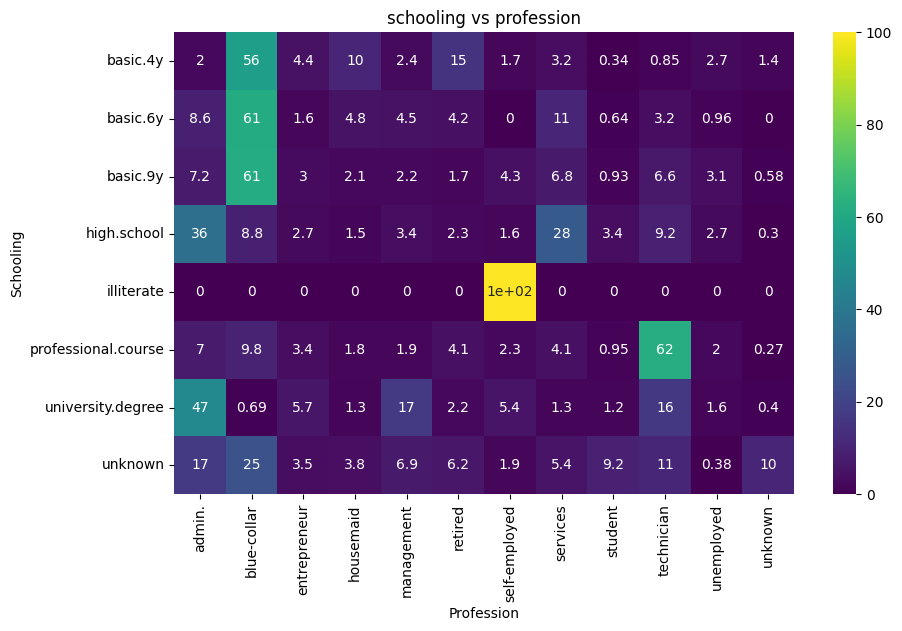

In [19]:
# schooling and profession dependency, pre-requisite for data treating the missing values of schooling
highlighted_cross_tab = pd.crosstab(df['schooling'], df['profession'], normalize='index') * 100
highlighted_cross_tab_style = highlighted_cross_tab.style.apply(lambda x: ['background-color: indigo' if val == x.max() else '' for val in x], axis=1)

# Convert styled DataFrame to HTML and visualize it using Seaborn heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(highlighted_cross_tab, annot=True, cmap='viridis')
plt.title('schooling vs profession')
plt.xlabel('Profession')
plt.ylabel('Schooling')
plt.savefig('../visuals/crosstab_schooling_and_profession.png', bbox_inches='tight', dpi=300) 
plt.show()

## Treating the Missing Values

- id column does not have significance in the data analysis, so the column is to drop.
- Profit have high percentage of missing values, to drop.
- Age, day of the week and schooling have missing values that almost account for 25% of the entire dataset but have impact on the target variable in different ways.

In [20]:
if 'profit' in df.columns:
    df.drop(columns=['id', 'profit'], inplace=True)
else :
    df.drop(columns=['id'], inplace=True)

In [21]:
# feature engineering to simplify the values in the feature schooling
schooling_simplified = {
    'basic.4y' : 'basic',
    'basic.6y' : 'basic',
    'basic.9y' : 'basic',
    'high.school': 'high.school',
    'illiterate':'illiterate',
    'professional.course': 'professional.course',
    'university.degree':'university.degree',
    'unknown':'unknown',
}
df.loc[:,'schooling'] = df['schooling'].replace(schooling_simplified)

# Imputation of missing values in schooling based on the results in the ../visual/crosstab_schooling_and_profession.png
imputation_mapping = {
    'blue-collar' : 'basic',
    'self-employed': 'illiterate',
    'technician'   : 'professional.course',
    'admin.'        : 'university.degree',
    'services'      : 'high.school',
    'management'    : 'university.degree',
    'retired'       : 'unknown',
    'entrepreneur'  : 'university.degree',
    'unknown' : 'unknown',
}
df['schooling'] = df['schooling'].combine_first(df['profession'].map(imputation_mapping)) #../visual/crosstab_schooling_and_profession.png

In [22]:
# Impute random day for missing 'day_of_week' values as per 9th figure in '../visuals/countplot_categorical_features.png' as day of week distribution is almost similar
df.loc[:,'day_of_week'] = df['day_of_week'].apply(lambda day: np.random.choice(['mon', 'tue', 'wed', 'thu', 'fri']) if pd.isna(day) else day)

In [23]:
# Drop the rest of rows with missing values
df = df.dropna()

## Feature Engineering of Categorical Features

1. Profession : The values in the column can be label encoded in the basis of employment and dependancy of the individual.

In [24]:
profession_mapping = {
    'admin.' : 'working',    
    'services' : 'working',
    'blue-collar' : 'working',
    'entrepreneur' : 'working',
    'technician' : 'working',
    'retired' : 'dependant',
    'student' : 'dependant',
    'unknown' : 'unknown',
    'unemployed' : 'unemployed',
    'self-employed' : 'working',
    'management' : 'working',
    'housemaid' : 'working',
}
df.loc[:,'profession'] = df['profession'].map(profession_mapping)
df['profession'].value_counts()

profession
working       5606
dependant      336
unemployed      98
unknown         52
Name: count, dtype: int64

2. Marital : In the classification of marital status, individuals who are either single or divorced are grouped together as a singular category, while those who are married or whose marital status is unknown are distinguished as separate categories.

In [25]:
marital_mapping = {
    'single': 'Single&Divorced',
    'divorced': 'Single&Divorced',
    'married': 'married',
    'unknown': 'Unknown', 
}
df.loc[:,'marital'] = df['marital'].map(marital_mapping)
df['marital'].value_counts()

marital
married            3688
Single&Divorced    2397
Unknown               7
Name: count, dtype: int64

In [26]:
schooling_mapping = {
    'basic' : 'basic_education',
    'illiterate' : 'uneducated',
    'professional.course' : 'educated',
    'high.school' : 'basic_education',
    'university.degree' : 'educated',
    'unknown' : 'unknown',

}
df.loc[:,'schooling'] = df['schooling'].map(schooling_mapping)
df['schooling'].value_counts()

schooling
basic_education    2948
educated           2768
unknown             299
uneducated           77
Name: count, dtype: int64

In [27]:
# Label encoding for 'day_of_week'
day_mapping = { 
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,   
    'fri': 5,
}
df.loc[:,'day_of_week'] = df['day_of_week'].map(day_mapping)
df['day_of_week'].value_counts()

day_of_week
1    1294
4    1275
3    1196
2    1184
5    1143
Name: count, dtype: int64

In [28]:
# Label encoding for 'month'
months = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

df.loc[:,'month'] = df['month'].map(months)
df['month'].value_counts()

month
5     2063
7      993
8      940
6      794
11     597
4      402
10     114
9       91
3       76
12      22
Name: count, dtype: int64

In [29]:
# Feature engineering pdays and pmonths by addressing 999
#pdays
conditions = [
    (df['pdays'] == 999),
    (df['pdays'] <= 10),
    (df['pdays'] > 10)
]
choices = ['first visit', 'within 10 days', 'greater than 10 days']
df['pdays'] = np.select(conditions, choices, default='unknown')

#pmonths
conditions = [
    (df['pmonths'] == 999),
    (df['pmonths'] <= 0.3),
    (df['pmonths'] > 0.3)
]
choices = ['first visit', 'within 3 months',  'greater than 3 months']
df['pmonths'] = np.select(conditions, choices, default='unknown')

## Encoding Categorical Features

In [30]:
# Specify the categorical columns
categorical_features = ['loan', 'marital', 'schooling', 'default', 'housing', 'pdays', 'pmonths', 'poutcome', 'profession', 'contact']

#  One-hot encode columns
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df_encoded

,custAge,month,day_of_week,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,pdays_greater than 10 days,pdays_within 10 days,pmonths_greater than 3 months,pmonths_within 3 months,poutcome_nonexistent,poutcome_success,profession_unemployed,profession_unknown,profession_working,contact_telephone
0,34.0,4,3,2.0,0.0,-1.8,93.075,-47.1,1.498,5099.1,...,False,False,False,False,True,False,False,False,True,False
1,31.0,7,4,35.0,0.0,1.4,93.918,-42.7,4.968,5228.1,...,False,False,False,False,True,False,False,False,True,False
3,52.0,7,2,2.0,0.0,1.4,93.918,-42.7,4.962,5228.1,...,False,False,False,False,True,False,False,False,True,False
4,39.0,7,2,6.0,0.0,1.4,93.918,-42.7,4.961,5228.1,...,False,False,False,False,True,False,False,False,True,False
5,40.0,6,4,3.0,0.0,1.4,94.465,-41.8,4.866,5228.1,...,False,False,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8231,34.0,8,3,1.0,0.0,1.4,93.444,-36.1,4.965,5228.1,...,False,False,False,False,True,False,False,False,True,False
8232,52.0,7,5,3.0,0.0,1.4,93.918,-42.7,4.962,5228.1,...,False,False,False,False,True,False,False,False,True,False
8233,55.0,10,4,2.0,1.0,-3.4,92.431,-26.9,0.722,5017.5,...,False,True,False,True,False,True,False,False,False,False
8234,41.0,6,1,11.0,0.0,1.4,94.465,-41.8,4.960,5228.1,...,False,False,False,False,True,False,False,False,True,True


In [31]:
df['responded'] = df['responded'].map({ 'no' : 0 , 'yes' : 1})
df['responded'].value_counts()

responded
0    5432
1     660
Name: count, dtype: int64

## Encoding Numerical Features

In [32]:
numerical_features = ['custAge', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pastEmail']

# Instantiate StandardScaler
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [33]:
df_encoded.to_excel('../data/processed/train_preprocessed.xlsx', index=False)